## Example: The Insurance Problem

Fill me in

### Setup

In [1]:
include("Include.jl");

  Activating project at `~/Desktop/julia_work/CHEME-5760-Examples-F23`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLDecisionsPackage.jl.git`
  No Changes to `~/Desktop/julia_work/CHEME-5760-Examples-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5760-Examples-F23/Manifest.toml`


In [2]:
α = 0.11;
β = 0.90;
W = 1000.0;
d = β*W
r = α*d;
number_of_trials = 50000;
number_of_points = 100;

### Expected Value Simulation
Fill me in

In [3]:
p₁ = 0.1; # probability that of entering the damage state
d₁ = Bernoulli(p₁);

In [28]:
expected_value_simulation_archive = Array{Float64,2}(undef, number_of_trials, 2);
for i ∈ 1:number_of_trials
    
    # role a random future state -
    future_state = rand(d₁);
    if (future_state == 1)
        expected_value_simulation_archive[i,1] = W - d
        expected_value_simulation_archive[i,2] = W - r
    else
        expected_value_simulation_archive[i,1] = W
        expected_value_simulation_archive[i,2] = W - r
    end
end

#### Decision: Numerical expected value

In [29]:
μ₁ = mean(expected_value_simulation_archive,dims=1) |> vec;
if (μ₁[1] ≥ μ₁[2])
    println("𝔼(A) = $(μ₁[1]) ≥ 𝔼(B) = $(μ₁[2]) => Don't purchase insurance")
else
    println("𝔼(A) = $(μ₁[1]) < 𝔼(B) = $(μ₁[2]) => Purchase insurance")
end

𝔼(A) = 910.36 ≥ 𝔼(B) = 910.0 => Don't purchase insurance


##### Check: Analytical expected value

In [6]:
expected_value_case_A = p₁*(W - d)+(1-p₁)*W;
expected_value_case_B = (W - r)
println("𝔼(A) = $(expected_value_case_A) and 𝔼(B) = $(expected_value_case_B)")

𝔼(A) = 910.0 and 𝔼(B) = 910.0


### Expected Utility Simulation

In [7]:
τ = 0.05
U(x,s) = x^(s)
IU(x,s) = x^(1/s);

In [8]:
expected_utility_simulation_archive = Array{Float64,2}(undef, number_of_trials, 2);
for i ∈ 1:number_of_trials
    
    # role a random future state -
    future_state = rand(d₁);
    if (future_state == 1)
        expected_utility_simulation_archive[i,1] = U(W - d, τ)
        expected_utility_simulation_archive[i,2] = U(W - r, τ)
    else
        expected_utility_simulation_archive[i,1] = U(W, τ)
        expected_utility_simulation_archive[i,2] = U(W - r, τ)
    end
end

In [9]:
μ₂ = mean(expected_utility_simulation_archive,dims=1) |> vec;
if (μ₂[1] ≥ μ₂[2])
    
    println("𝔼𝕌(A) = $(μ₂[1]) ≥ 𝔼𝕌(B) = $(μ₂[2]) => Don't purchase insurance")
else
    println("𝔼𝕌(A) = $(μ₂[1]) < 𝔼𝕌(B) = $(μ₂[2]) => Purchase insurance")
end

𝔼𝕌(A) = 1.3972193427370851 < 𝔼𝕌(B) = 1.4058923559622694 => Purchase insurance


##### Check: Analytical expected utility value

In [10]:
expected_utility_case_A = p₁*U(W - d, τ)+(1-p₁)*U(W, τ);
expected_utility_case_B = U(W - r, τ)
if (expected_utility_case_A ≥ expected_utility_case_B)
    
    println("𝔼𝕌(A) = $(expected_utility_case_A) ≥ 𝔼𝕌(B) = $(expected_utility_case_B) => Don't purchase insurance")
else
    println("𝔼𝕌(A) = $(expected_utility_case_A) < 𝔼𝕌(B) = $(expected_utility_case_B) => Purchase insurance")
end

𝔼𝕌(A) = 1.3971763313398957 < 𝔼𝕌(B) = 1.4058923559622727 => Purchase insurance


### Computing the Certainty Equivalent and the Risk Premium
The certainty equivalent (CE) is a guaranteed level of wealth that provides the same amount of utility as the expected utility of a risky scenario. For example, in the insurance problem, the certainty equivlent is given by:

$$
\begin{equation}
\text{CE} = U^{-1}\Bigl(\mathbb{EU}(A)\Bigr)
\end{equation}
$$

where $\mathbb{EU}(A)$ denotes the expected utility of scenario $A$ (no insurance) and $U^{-1}\left(\cdot\right)$ denotes the inverse of the utility function. A decision-maker is indifferent between receiving the certainty equivalent and the risky scenario.A decision-maker is indifferent between receiving the certainty equivalent and the risky scenario. On the other hand, the risk premium $R_{P}$ is the difference between the _expected value of the risky case_, i.e., $\mathbb{E}(\text{A})$ minus the certantiy equivalent:

$$
\begin{equation}
R_{P} = \mathbb{E}(\text{A}) - \text{CE}
\end{equation}
$$

#### Computing the Certainty Equivalent (CE)

In [11]:
utility_array = Array{Float64,2}(undef,number_of_points,2);
WA = range(0.8*(W-d), stop = 1.2*W, length = number_of_points) |> collect;
for i ∈ 1:number_of_points
    utility_array[i,1] = WA[i];
    utility_array[i,2] = U(WA[i],τ);
end

In [12]:
tie_line = Array{Float64,2}(undef,number_of_points,2);
θ = range(0,1,length = number_of_points) |> collect;
for i ∈ 1:number_of_points
    θᵢ = θ[i];
    tie_line[i,1] = θᵢ*W + (1-θᵢ)*(W-d)
    tie_line[i,2] = θᵢ*U(W,τ) + (1-θᵢ)*U(W-d,τ)
end

In [13]:
VLINE₁ = zeros(number_of_points, 2);
VLINE₁[:,1] .= IU(expected_utility_case_A,τ)*ones(number_of_points);
VLINE₁[:,2] .= range(minimum(utility_array[:,2]), maximum(utility_array[:,2]), length=number_of_points) |> collect;

In [14]:
point_A = [IU(expected_utility_case_A,τ), expected_utility_case_A];

In [15]:
B₁ = W - d
B₂ = W
γ = (IU(expected_utility_case_A,τ) - B₁)/(B₂ - B₁)
point_B = [IU(expected_utility_case_A,τ), γ*U(W,τ) + (1-γ)*U(W-d,τ)];

In [16]:
point_C = [IU(point_B[2],τ), point_B[2]];
CE = point_C[1];

In [17]:
VLINE₂ = zeros(number_of_points, 2);
VLINE₂[:,1] .= point_C[1]*ones(number_of_points);
VLINE₂[:,2] .= range(minimum(utility_array[:,2]), maximum(utility_array[:,2]), length=number_of_points) |> collect;

In [18]:
HLINE = zeros(number_of_points, 2);
HLINE[:,1] .= range(0.8*(W-d), 1.2*(W), length=number_of_points) |> collect;
HLINE[:,2] .= point_B[2]*ones(number_of_points);

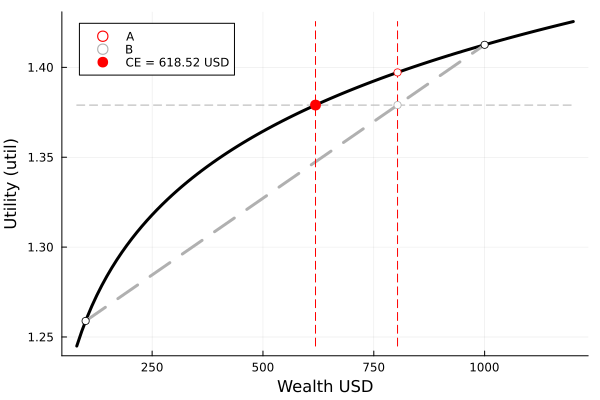

In [19]:
plot(utility_array[:,1],utility_array[:,2], label="", xlabel="Wealth USD", ylabel = "Utility (util)", lw=3, c=:black)
plot!(tie_line[:,1],tie_line[:,2], label="", lw=3, c=:gray69, ls=:dash)
plot!(VLINE₁[:,1], VLINE₁[:,2], label="", c=:red, ls=:dash)
plot!(VLINE₂[:,1], VLINE₂[:,2], label="", c=:red, ls=:dash)
plot!(HLINE[:,1], HLINE[:,2], label="", c=:gray69, ls=:dash, lw=1)
scatter!([W-d],[U(W-d,τ)], label="", msc=:black, mc=:white)
scatter!([W],[U(W,τ)], label="", msc=:black, mc=:white)
scatter!([point_A[1]],[point_A[2]], label="A", msc=:red, mc=:white)
scatter!([point_B[1]],[point_B[2]],label="B", msc=:gray69, mc=:white)
scatter!([point_C[1]],[point_C[2]],label="CE = $(round(point_C[1],digits=2)) USD", msc=:red, mc=:red, ms=6)

#### Computing the Risk Premium (RP)

In [20]:
RP = expected_value_case_A - CE

291.4782419492328

In [21]:
r̄ = p₁*d + RP

381.4782419492328